In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [2]:
#setting working directory
os.chdir("D:/Edwisor/Project 1 - Churn Reduction/Python")

In [3]:
os.getcwd()

'D:\\Edwisor\\Project 1 - Churn Reduction\\Python'

In [4]:
#loading the data
train_df = pd.read_csv("Train_data.csv")
test_df = pd.read_csv("Test_data.csv")

In [5]:
train_df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [6]:
train_df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls', 'Churn'],
      dtype='object')

In [7]:
#checking for Null values in training
train_df.isnull().sum()

state                            0
account length                   0
area code                        0
phone number                     0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn                            0
dtype: int64

In [7]:
#checking for Null values in test
test_df.isnull().sum()

state                            0
account length                   0
area code                        0
phone number                     0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn                            0
dtype: int64

In [8]:
print(train_df.dtypes)

state                             object
account length                     int64
area code                          int64
phone number                      object
international plan                object
voice mail plan                   object
number vmail messages              int64
total day minutes                float64
total day calls                    int64
total day charge                 float64
total eve minutes                float64
total eve calls                    int64
total eve charge                 float64
total night minutes              float64
total night calls                  int64
total night charge               float64
total intl minutes               float64
total intl calls                   int64
total intl charge                float64
number customer service calls      int64
Churn                             object
dtype: object


In [9]:
#converting datatype of area code
train_df['area code'] = train_df['area code'].astype(object)

In [10]:
cnames_cat = ['state','area code','phone number','international plan','voice mail plan']

In [11]:
#Chi-square test
for i in cnames_cat:
    print(i)
    chi2,p,dof,ex = chi2_contingency(pd.crosstab(train_df['Churn'],train_df[i]))
    print(p,chi2,dof)

state
0.002296221552011188 83.04379191019663 50
area code
0.9150556960243712 0.17754069117425395 2
phone number
0.49185608455943547 3332.999999999999 3332
international plan
2.4931077033159556e-50 222.5657566499376 1
voice mail plan
5.15063965903898e-09 34.13166001075673 1


In [12]:
#p-value of phone number and area code is greater than 0.05
#dropping phone number and area code after chi-square test
train_df = train_df.drop(["area code","phone number"], axis = 1)
test_df = test_df.drop(["area code","phone number"], axis = 1)

In [13]:
train_df.head(3)

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


In [14]:
test_df.head(3)

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,HI,101,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,MT,137,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,OH,103,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.


In [15]:
cnames_cont = train_df.select_dtypes(include=[np.number]).columns.tolist()

In [16]:
cnames_cont

['account length',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'number customer service calls']

In [17]:
#correlation for numeric
train_df_corr_df = train_df.loc[:,cnames_cont]
train_df_corr = train_df_corr_df.corr()

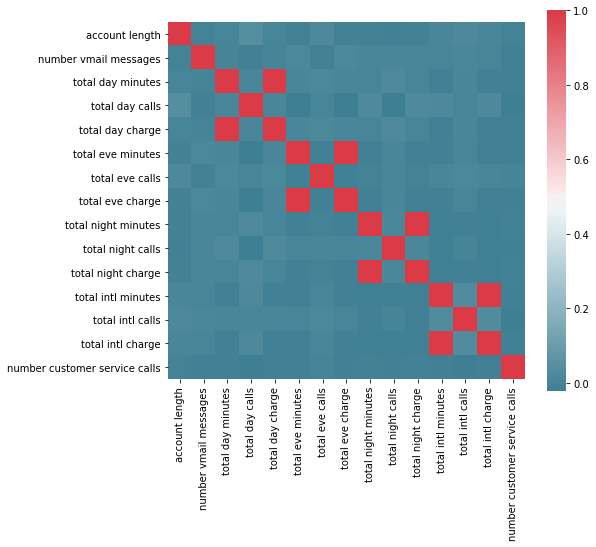

In [18]:
f,ax = plt.subplots(figsize=(8,7))
sns.heatmap(train_df_corr,
            mask = np.zeros_like(train_df_corr,dtype = np.bool),
            cmap = sns.diverging_palette(220,10,as_cmap=True),
            square = True, ax = ax)

In [19]:
#removing 'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes' as per the correlation value
train_df = train_df.drop(['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'], axis = 1)
test_df = test_df.drop(['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'], axis = 1)

In [20]:
train_df["state"].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
WY     77
VA     77
CT     74
VT     73
ID     73
MI     73
UT     72
TX     72
IN     71
KS     70
MD     70
MT     68
NC     68
NJ     68
WA     66
CO     66
NV     66
MS     65
MA     65
RI     65
AZ     64
FL     63
MO     63
ME     62
ND     62
NM     62
DE     61
OK     61
NE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [21]:
#Label Encoding for Categorical Variables
l_encoder = LabelEncoder()

In [22]:
train_df["international plan"] = l_encoder.fit_transform(train_df["international plan"])
test_df["international plan"] = l_encoder.fit_transform(test_df["international plan"])
train_df["voice mail plan"] = l_encoder.fit_transform(train_df["voice mail plan"])
test_df["voice mail plan"] = l_encoder.fit_transform(test_df["voice mail plan"])
train_df["Churn"] = l_encoder.fit_transform(train_df["Churn"])
test_df["Churn"] = l_encoder.fit_transform(test_df["Churn"])

In [23]:
train_df.head(3)

,state,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,OH,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,NJ,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0


In [24]:
#dummy encoding
state_dummies = pd.get_dummies(train_df["state"],prefix = 'state')
state_dummies_test = pd.get_dummies(test_df["state"],prefix = 'state')

In [25]:
state_dummies.head(5)

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
state_dummies_test.head(5)

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
train_df = pd.concat([train_df,state_dummies],join='inner',axis=1)
test_df = pd.concat([test_df,state_dummies_test],join='inner',axis=1)
train_df = train_df.drop(["state"], axis = 1)
test_df = test_df.drop(["state"], axis = 1)

In [28]:
train_df.head(5)

,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,0,1,25,110,45.07,99,16.78,91,11.01,...,0,0,0,0,0,0,0,0,0,0
1,107,0,1,26,123,27.47,103,16.62,103,11.45,...,0,0,0,0,0,0,0,0,0,0
2,137,0,0,0,114,41.38,110,10.30,104,7.32,...,0,0,0,0,0,0,0,0,0,0
3,84,1,0,0,71,50.90,88,5.26,89,8.86,...,0,0,0,0,0,0,0,0,0,0
4,75,1,0,0,113,28.34,122,12.61,121,8.41,...,0,0,0,0,0,0,0,0,0,0


In [30]:
y_train = train_df["Churn"]
y_test = test_df["Churn"]
x_train = train_df.drop(["Churn"], axis = 1)
x_test = test_df.drop(["Churn"], axis = 1)

In [58]:
#Decision tree model training
DT_model = tree.DecisionTreeClassifier().fit(x_train,y_train)

In [59]:
DT_pred = DT_model.predict(x_test)

In [60]:
DT_confusion_matrix = pd.crosstab(y_test,DT_pred)

In [61]:
#saving TN,TP,FP,FN
TN = DT_confusion_matrix.iloc[0,0]
TP = DT_confusion_matrix.iloc[1,1]
FN = DT_confusion_matrix.iloc[1,0]
FP = DT_confusion_matrix.iloc[0,1]

In [63]:
#accuracy of Decision tree = 92.50%
accuracy = ((TP+TN)*100)/(TP+TN+FP+FN)
#false negative rate of Decision tree = 28.57%
FNR = (FN*100)/(FN+TP)
#true negative rate or specificity of Decision tree = 95.77%
specificity = (TN*100)/(TN+FP)
#true positive rate or recall or sensitivity of Decision tree = 71.42% 
recall = (TP*100)/(TP+FN)
print("Accuracy = ", accuracy)
print("False Negative Rate = ", FNR)
print("Specificity = ", specificity)
print("Recall = ", recall)

Accuracy =  92.50149970006
False Negative Rate =  28.571428571428573
Specificity =  95.77269577269577
Recall =  71.42857142857143


In [68]:
#Random Forest model training
RF_model = RandomForestClassifier(n_estimators=500).fit(x_train,y_train)

In [69]:
RF_pred = RF_model.predict(x_test)

In [70]:
RF_confusion_matrix = pd.crosstab(y_test, RF_pred)

In [71]:
#saving TN,TP,FP,FN
TN = RF_confusion_matrix.iloc[0,0]
TP = RF_confusion_matrix.iloc[1,1]
FN = RF_confusion_matrix.iloc[1,0]
FP = RF_confusion_matrix.iloc[0,1]

In [72]:
#accuracy of Random Forest = 94.72%
accuracy = ((TP+TN)*100)/(TP+TN+FP+FN)
#false negative rate of Random Forest = 38.39%
FNR = (FN*100)/(FN+TP)
#true negative rate or specificity of Random Forest = 99.86%
specificity = (TN*100)/(TN+FP)
#true positive rate or recall or sensitivity of Random Forest = 61.60% 
recall = (TP*100)/(TP+FN)
print("Accuracy = ", accuracy)
print("False Negative Rate = ", FNR)
print("Specificity = ", specificity)
print("Recall = ", recall)

Accuracy =  94.72105578884224
False Negative Rate =  38.392857142857146
Specificity =  99.86139986139986
Recall =  61.607142857142854


In [73]:
#Logistic Regression training model
logit_model = LogisticRegression().fit(x_train, y_train)

C:\Users\samke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [74]:
logit_pred = logit_model.predict(x_test)

In [75]:
logit_pred

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
logit_confusion_matrix = pd.crosstab(y_test, logit_pred)

In [77]:
#saving TN,TP,FP,FN
TN = logit_confusion_matrix.iloc[0,0]
TP = logit_confusion_matrix.iloc[1,1]
FN = logit_confusion_matrix.iloc[1,0]
FP = logit_confusion_matrix.iloc[0,1]

In [78]:
#accuracy of Logisitic Regression = 87.28%
accuracy = ((TP+TN)*100)/(TP+TN+FP+FN)
#false negative rate of Logisitic Regression = 78.57%
FNR = (FN*100)/(FN+TP)
#true negative rate or specificity of Logisitic Regression = 97.50%
specificity = (TN*100)/(TN+FP)
#true positive rate or recall or sensitivity of Logisitic Regression = 21.42% 
recall = (TP*100)/(TP+FN)
print("Accuracy = ", accuracy)
print("False Negative Rate = ", FNR)
print("Specificity = ", specificity)
print("Recall = ", recall)

Accuracy =  87.28254349130174
False Negative Rate =  78.57142857142857
Specificity =  97.5051975051975
Recall =  21.428571428571427


In [85]:
#Naive Bayes Training model
NB_model = GaussianNB().fit(x_train, y_train)

In [86]:
NB_pred = NB_model.predict(x_test)

In [87]:
NB_confusion_matrix = pd.crosstab(y_test, NB_pred)

In [88]:
#saving TN,TP,FP,FN
TN = NB_confusion_matrix.iloc[0,0]
TP = NB_confusion_matrix.iloc[1,1]
FN = NB_confusion_matrix.iloc[1,0]
FP = NB_confusion_matrix.iloc[0,1]

In [89]:
#accuracy of Naive Bayes = 57.64%
accuracy = ((TP+TN)*100)/(TP+TN+FP+FN)
#false negative rate of Naive Bayes = 44.19%
FNR = (FN*100)/(FN+TP)
#true negative rate or specificity of Naive Bayes = 57.93%
specificity = (TN*100)/(TN+FP)
#true positive rate or recall or sensitivity of Naive Bayes = 55.80% 
recall = (TP*100)/(TP+FN)
print("Accuracy = ", accuracy)
print("False Negative Rate = ", FNR)
print("Specificity = ", specificity)
print("Recall = ", recall)

Accuracy =  57.648470305938815
False Negative Rate =  44.19642857142857
Specificity =  57.93485793485794
Recall =  55.80357142857143
